In [90]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from pandas import DataFrame, Series
import pandas as pd

n_pca_components = 196
n_gmm_components = 10

def load_train_data():
    df: DataFrame = pd.read_csv('../data/train.csv')
    xs: DataFrame = df.iloc[:, 1:]
    ys: Series = df.iloc[:, 0]
    return xs, ys

def get_model(xs, ys):
    pca = PCA(n_components=n_pca_components)
    xs_pca = pca.fit_transform(xs.to_numpy())
    print(xs_pca.shape)
    model: GaussianMixture = GaussianMixture(n_components=n_gmm_components)
    model.fit(xs_pca)
    return model, xs_pca

xs, ys = load_train_data()
model, xs_pca = get_model(xs, ys)

(42000, 196)


In [69]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from pandas import DataFrame, Series
import pandas as pd

def load_train_data():
    df: DataFrame = pd.read_csv('../data/train.csv')
    xs: DataFrame = df.iloc[:, 1:]
    ys: Series = df.iloc[:, 0]
    return xs, ys

def get_model(xs):
    model: GaussianMixture = GaussianMixture(n_components=n_gmm_components)
    model.fit(xs.to_numpy())
    return model

xs, ys = load_train_data()
model = get_model(xs)

In [150]:
import numpy as np
from numpy.typing import NDArray
from typing import Dict
from sklearn.metrics import accuracy_score, confusion_matrix

def get_clusters(xs: NDArray[np.float64], gmm_labels: NDArray[np.int8]) -> Dict[int, NDArray[np.float64]]:
    clusters: Dict[int, NDArray[np.float64]] = {}
    for i in range(n_gmm_components):
        clusters[i] = xs[gmm_labels == i]
    return clusters

def get_cluster_to_digit_mappings(gmm_labels: NDArray[np.int64], ys: NDArray[np.int64]) -> NDArray[np.int64]:
    cluster_to_digit_mapping: NDArray[np.int64] = np.zeros(n_gmm_components, dtype=int)
    for i in range(n_gmm_components):
        cluster_indices: NDArray[np.int64] = np.where(gmm_labels == i)[0]
        true_labels: NDArray[np.int64] = ys[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        cluster_to_digit_mapping[i] = most_common_label
    return cluster_to_digit_mapping

def get_accuracy(ys_true: NDArray[np.float64], ys_pred: NDArray[np.float64]) -> float:
    accuracy: float = accuracy_score(ys_true, ys_pred)
    return accuracy

def get_confusion_matrix(ys_true: NDArray[np.float64], ys_pred: NDArray[np.float64]) -> np.ndarray:
    cm: np.ndarray = confusion_matrix(ys_true, ys_pred)
    return cm

ys_numpy: NDArray[np.float64] = ys.to_numpy()
gmm_labels: NDArray[np.int8] = model.predict(xs_pca)
clusters: Dict[int, NDArray[np.float64]] = get_clusters(xs_pca, gmm_labels)
cluster_to_digit_mapping: NDArray[np.int64] = get_cluster_to_digit_mappings(gmm_labels, ys_numpy)
predicted_digits: NDArray[np.float64] = cluster_to_digit_mapping[gmm_labels]
accuracy: float = get_accuracy(ys_numpy, predicted_digits)
confusion_matrix: np.ndarray = get_confusion_matrix(ys_numpy, predicted_digits)

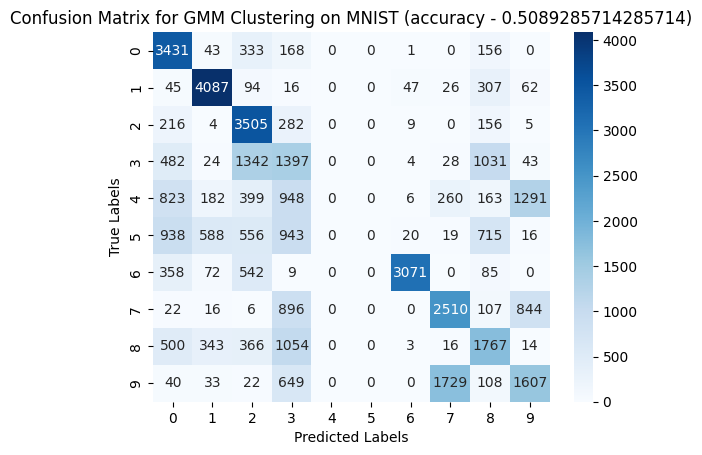

In [94]:
import io
import matplotlib.pyplot as plt
import seaborn as sns

heat_map = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for GMM Clustering on MNIST (accuracy - {accuracy})')

buf = io.BytesIO()
plt.savefig(buf, format='png')
# plt.close()
buf.seek(0)
buf.getvalue()
plt.show()

[6 1 3 7 0 8 2 0 9 1]
{0: array([[  38.37913729, -370.39325693, -431.63246677, ...,   17.95543714,
          17.00686597,   19.62009522],
       [ 100.05302187,   60.30652556, -400.41656473, ...,  -26.7501626 ,
          39.82092708,   66.17925682],
       [-345.4588015 ,  248.35472012,   76.65193008, ...,   -1.06202167,
          -9.92676787,   16.13550234],
       ...,
       [ 243.75834842, -390.38851419,   -3.78336947, ...,    2.53011153,
          57.85595295,   28.82710118],
       [ 479.83994778,  -28.72485036,   -3.61043637, ...,  -64.24753534,
          14.95219401,  -48.6327526 ],
       [ 327.39939154,  -62.01608944, -697.53640055, ...,  -28.24838742,
           1.85560396,  -43.92756072]]), 1: array([[ -886.89443411,   293.76578219,   -67.15530988, ...,
           19.97208179,    -4.61392417,     8.08471599],
       [ -965.67593327,   358.83725393,   -97.96259165, ...,
           21.39216777,     8.1241665 ,    -7.14303691],
       [ -964.44469664,   282.38973754,    12.514

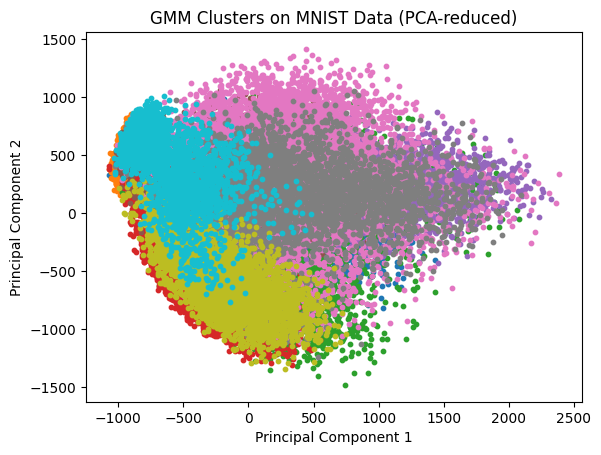

In [95]:
print(cluster_to_digit_mapping)
print(clusters)

# # img_buffer = io.BytesIO()
for key, cluster in clusters.items():
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Digit: {cluster_to_digit_mapping[key]}', s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clusters on MNIST Data (PCA-reduced)')
# plt.savefig(img_buffer, format='png', bbox_inches='tight', pad_inches=0)
# plt.close()
# img_buffer.seek(0)
# img_buffer.getvalue()
plt.show()

In [100]:
def sample():
    xs, ys = model.sample()
    # sample_array = np.array(xs[0]).reshape(14, 14)
    # plt.imshow(sample_array, cmap='gray')
    # plt.title(ys[0])
    # plt.show()
    return xs[0], ys[0]

def predict(x):
    y = model.predict([x])
    print(y)
    return y

# sample()
# x, y = sample()
print(type(pca))
# print(x.shape)
# y = predict(x)
# print(xs.shape)
# print(type(xs))

NameError: name 'pca' is not defined

# POLISHED

## FIT MODEL

In [324]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from pandas import DataFrame, Series
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

n_pca_components = 30
n_gmm_components = 200

def load_train_data():
    df: DataFrame = pd.read_csv('../data/train.csv')
    xs: DataFrame = df.iloc[:, 1:]
    ys: Series = df.iloc[:, 0]
    return xs, ys

def fit(xs, ys, labels):
    pca_dict = {}
    models_dict = {}
    for y in labels:
        print(f'Fitting digit {y}')
        pca = PCA(n_components=n_pca_components)
        xs_pca = pca.fit_transform(xs[ys == y].to_numpy())
        model: GaussianMixture = GaussianMixture(n_components=n_gmm_components)
        model.fit(xs_pca)
        models_dict[y] = model
        pca_dict[y] = pca
    return models_dict, pca_dict

xs, ys = load_train_data()
labels = ys.unique()
models_dict, pca_dict = fit(xs, ys, labels)

Fitting digit 1
Fitting digit 0
Fitting digit 4
Fitting digit 7
Fitting digit 3
Fitting digit 5
Fitting digit 8
Fitting digit 9
Fitting digit 2
Fitting digit 6


# Find optimal n_components for each dgit

In [ ]:
digits = np.arange(0,10)
n_gmm_components_options = np.arange(0, 250, 50)[1:]
n_pca_components_options = np.arange(0, 200, 50)[1:]

def load_train_data():
    df: DataFrame = pd.read_csv('../data/train.csv')
    xs: DataFrame = df.iloc[:, 1:]
    ys: Series = df.iloc[:, 0]
    return xs, ys

def generate_samples(amount, model, pca):
    generated_xs = []
    for _ in range(amount):
        xs, _ = model.sample()
        x = pca.inverse_transform(xs[0])
        generated_xs.append(x)
    return np.array(generated_xs).reshape(-1, 28, 28, 1)

def plot_samples(amount, samples, digit, n_gmm_components):   
    _, axs = plt.subplots(1, amount, figsize=(amount * 3, 3))
    for i in range(amount):
        img = np.array(samples[i]).reshape(28, 28)
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(labels[i])
        axs[i].axis('off') 
    plt.title(f'Samples of Digit {digit} with {n_gmm_components} GMM components')
    plt.show()

def fit_model(xs, ys, digit, n_gmm_components, n_pca_components):
    print(f'GMM {n_gmm_components} | PCA {n_pca_components}')
    pca = PCA(n_components=n_pca_components)
    xs_pca = pca.fit_transform(xs[ys == digit].to_numpy())
    model: GaussianMixture = GaussianMixture(n_components=n_gmm_components)
    model.fit(xs_pca)
    generated_samples = generate_samples(3, model, pca)
    plot_samples(3, generated_samples, digit, n_gmm_components)

xs, ys = load_train_data()
for digit in digits:
    for n_gmm_components in n_gmm_components_options:
        for n_pca_components in n_pca_components_options:
            fit_model(xs, ys, digit, n_gmm_components, n_pca_components)

# Sample

In [ ]:
def sample(label, models_dict, pca_dict):
    model = models_dict[label]
    pca = pca_dict[label]
    xs, _ = model.sample()
    x = pca.inverse_transform(xs[0])
    return x

def plot_sample(x, y):
    img = np.array(x).reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(y)
    plt.show()


for label in labels:
    x = sample(label, models_dict, pca_dict)
    plot_sample(x, label)

# Evaluate digit

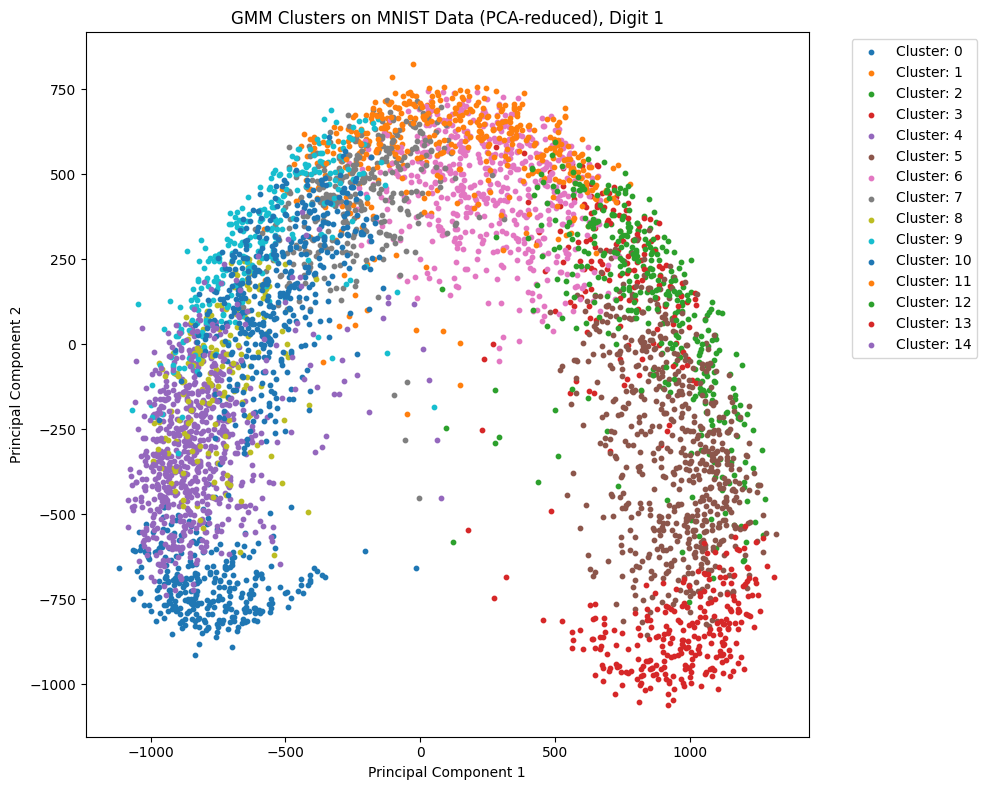

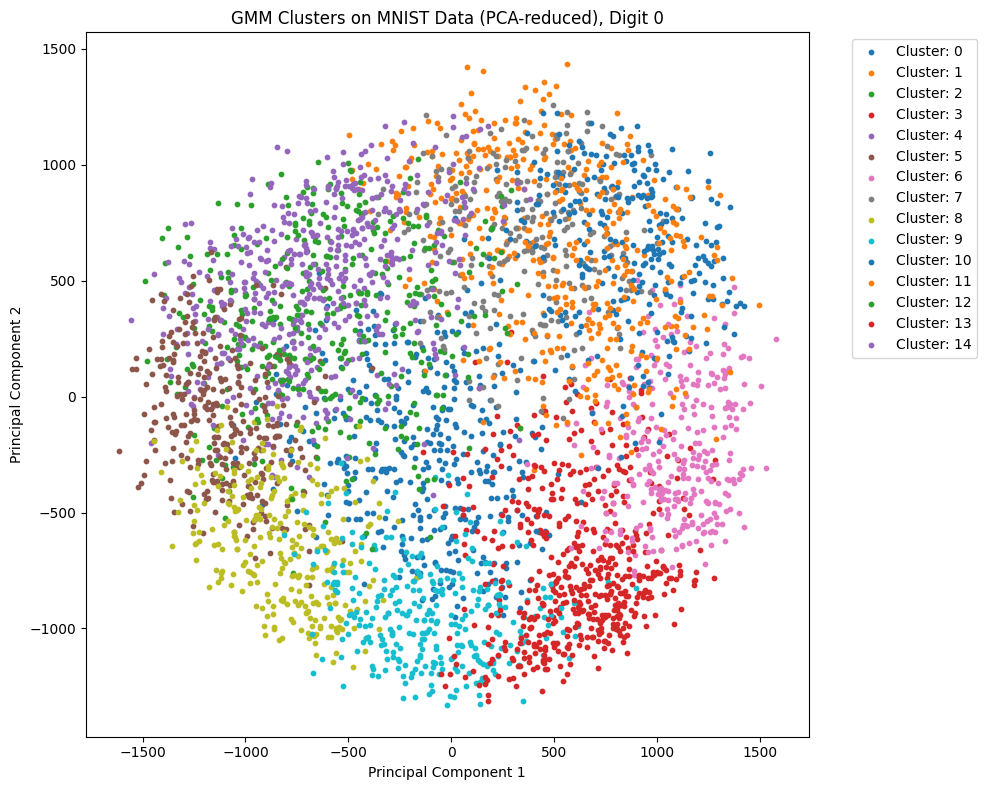

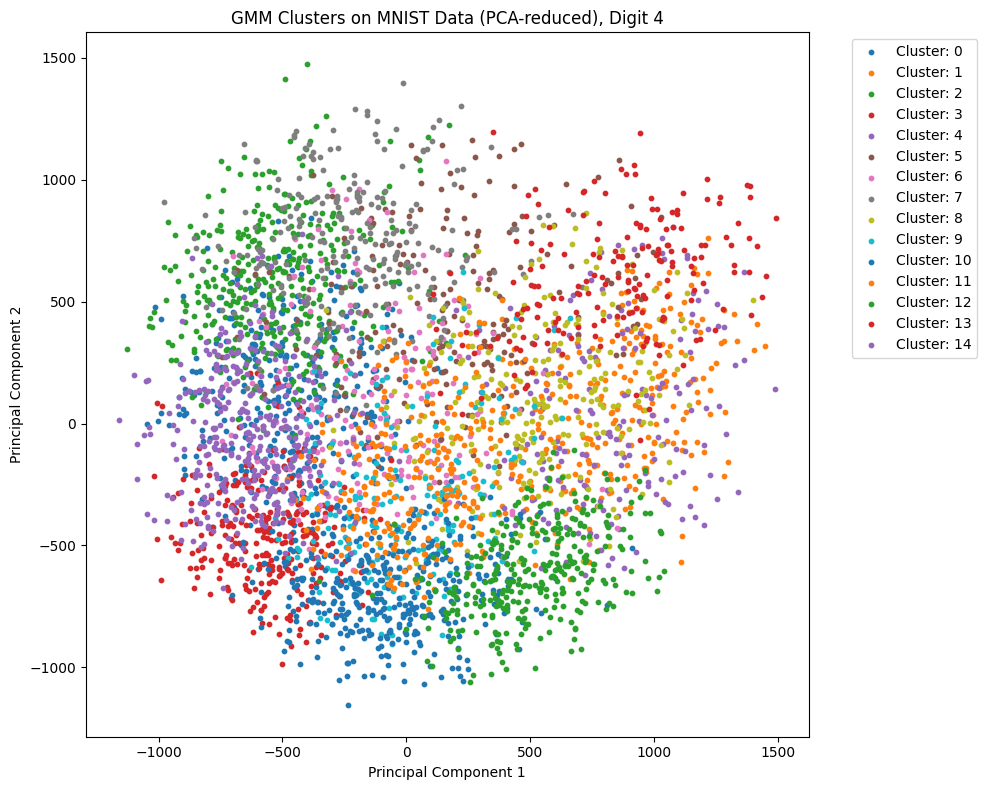

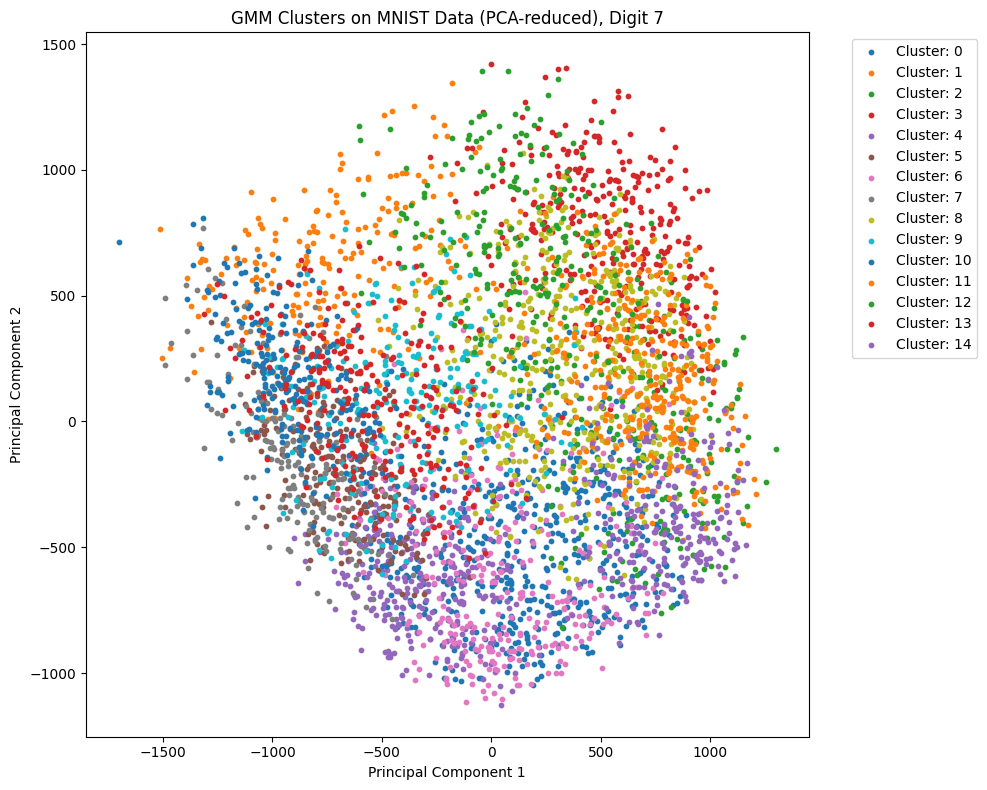

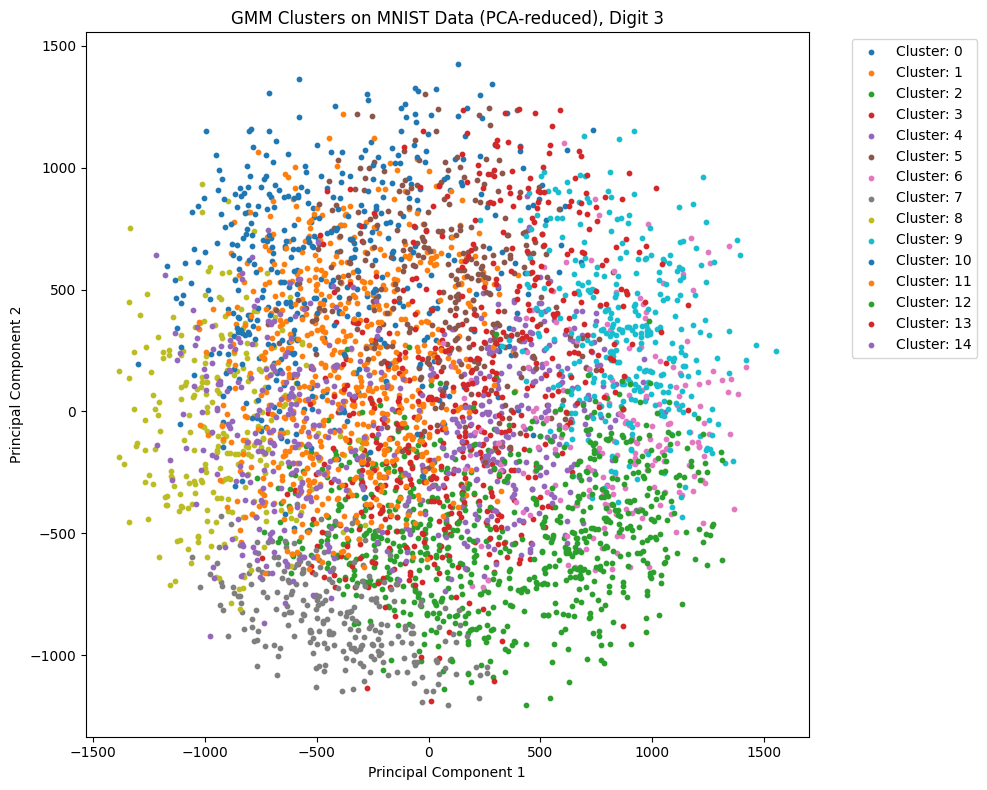

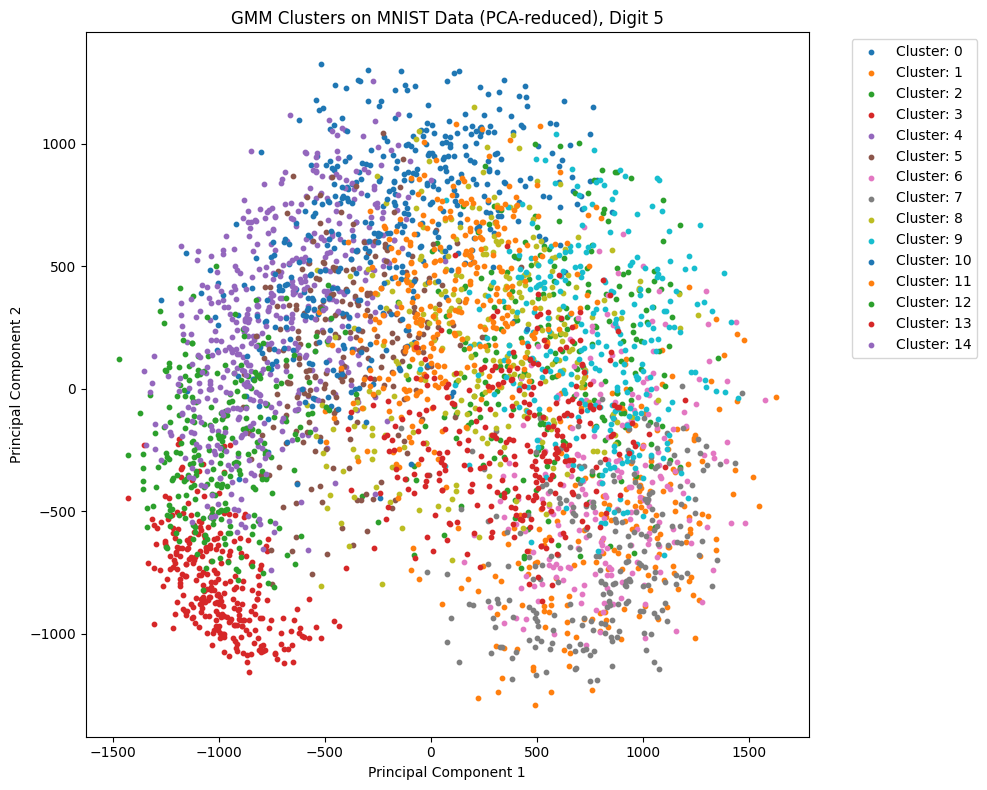

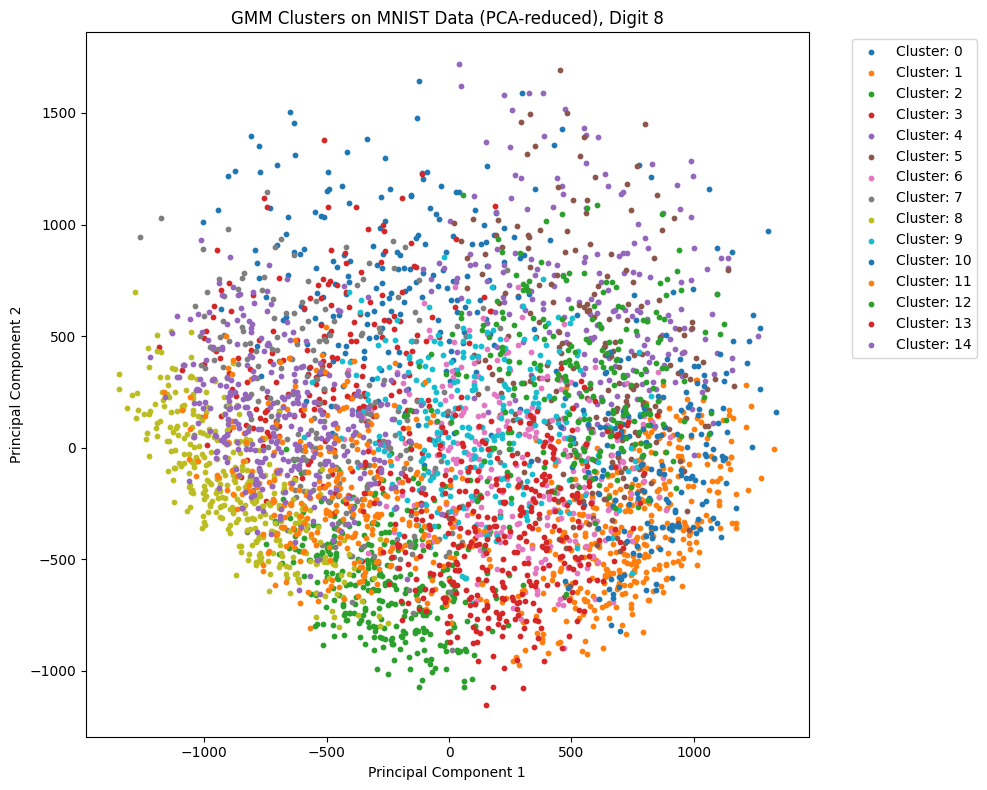

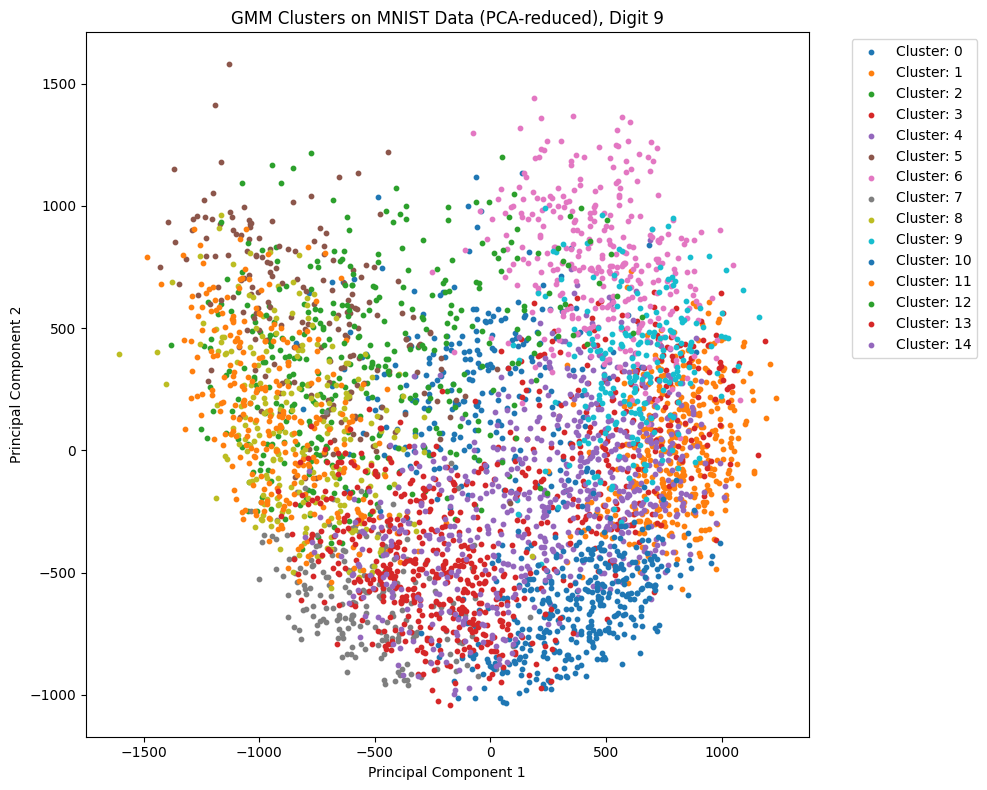

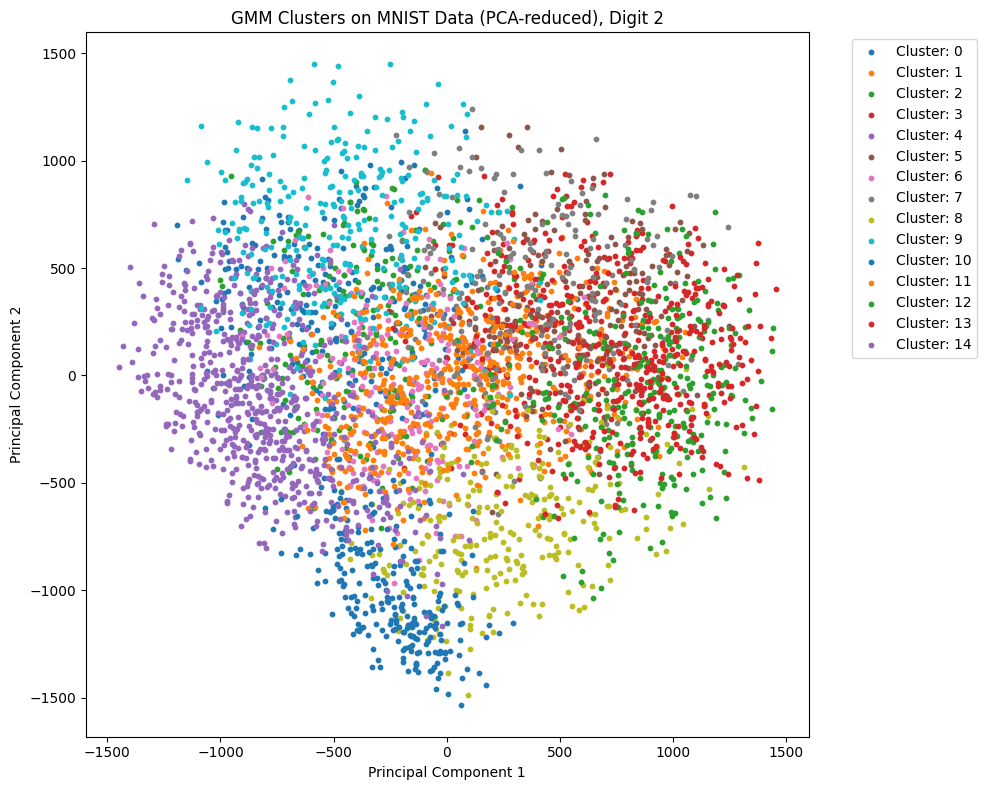

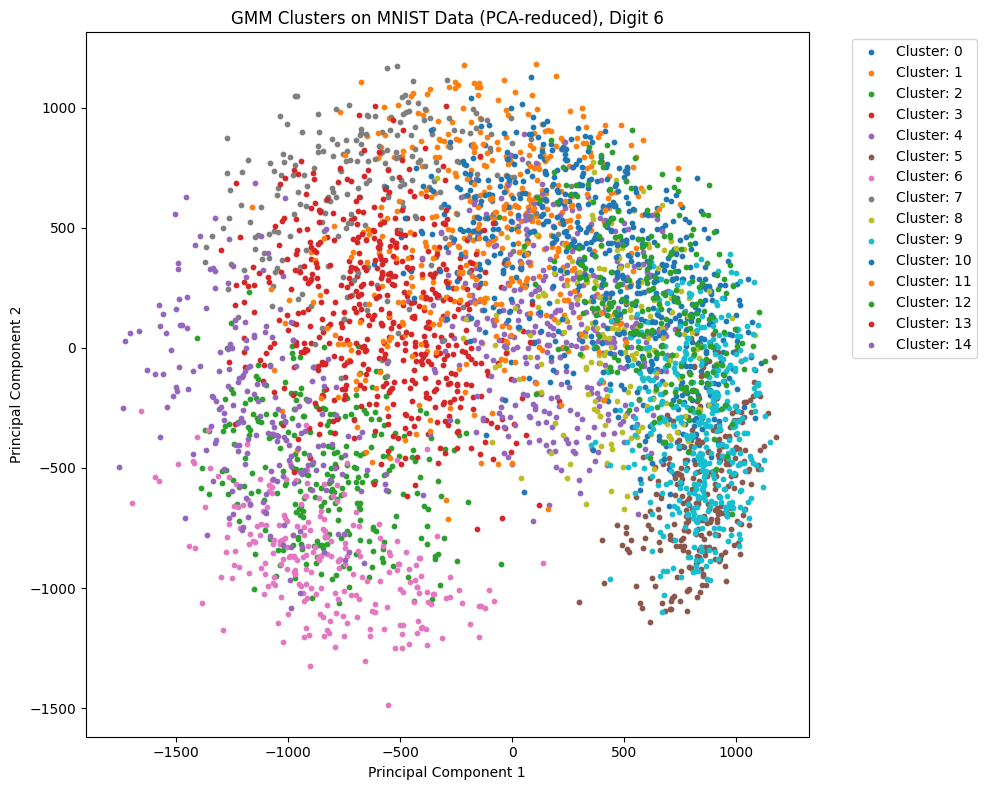

In [286]:
def get_label_clusters(y, models_dict, pca_dict, xs):
    model = models_dict[label]
    pca = pca_dict[label]
    xs_pca = pca.transform(xs[ys == y].to_numpy())
    gmm_labels = model.predict(xs_pca)
    clusters: Dict[int, np.ndarray] = {}
    for i in range(n_gmm_components):
        clusters[i] = xs_pca[gmm_labels == i]
    return clusters

def plot_clusters(clusters, label):
    plt.figure(figsize=(10, 8))
    for key, cluster in clusters.items():
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster: {key}', s=10)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'GMM Clusters on MNIST Data (PCA-reduced), Digit {label}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
    plt.tight_layout()
    plt.show()

for label in labels:
    clusters = get_label_clusters(label, models_dict, pca_dict, xs)
    plot_clusters(clusters, label)


In [ ]:
def get_clusters(xs, ys, model, pca):
    xs_pca = pca.fit_transform(xs.to_numpy())
    ys_true = ys.to_numpy()

    gmm_labels = model.predict(xs_pca)
    clusters: Dict[int, np.ndarray] = {}
    cluster_to_digit_mapping = np.zeros(n_gmm_components, dtype=int)
    for i in range(n_gmm_components):
        clusters[i] = xs_pca[gmm_labels == i]
        cluster_indices = np.where(gmm_labels == i)[0]
        true_labels = ys_true[cluster_indices]
        most_common_label = np.bincount(true_labels).argmax()
        cluster_to_digit_mapping[i] = most_common_label

    ys_pred: np.ndarray = cluster_to_digit_mapping[gmm_labels]
    accuracy: float = accuracy_score(ys_true, ys_pred)
    cm: np.ndarray = confusion_matrix(ys_true, ys_pred)
    return clusters, cluster_to_digit_mapping, accuracy, cm

## Evaluation

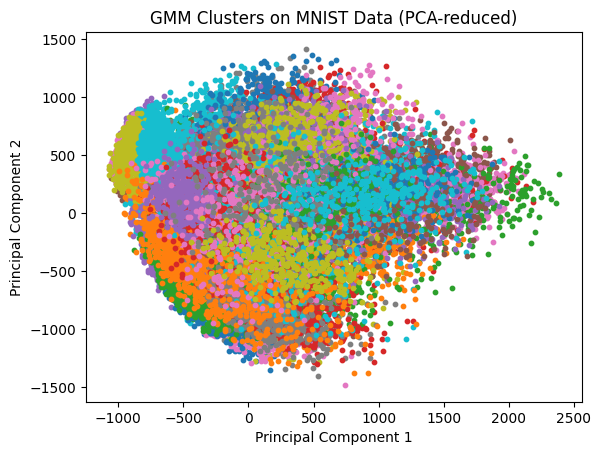

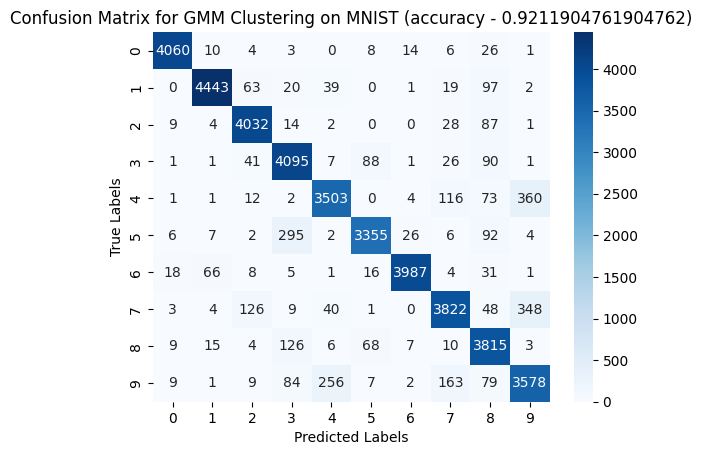

In [224]:
def plot_clusters(clusters, cluster_to_digit_mapping):
    for key, cluster in clusters.items():
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Digit: {cluster_to_digit_mapping[key]}', s=10)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('GMM Clusters on MNIST Data (PCA-reduced)')
    plt.show()

def plot_confusion_matrix(cm, accuracy):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for GMM Clustering on MNIST (accuracy - {accuracy})')
    plt.show()   

plot_clusters(cluster, cluster_to_digit_mapping)
plot_confusion_matrix(cm, accuracy)

## SAMPLE

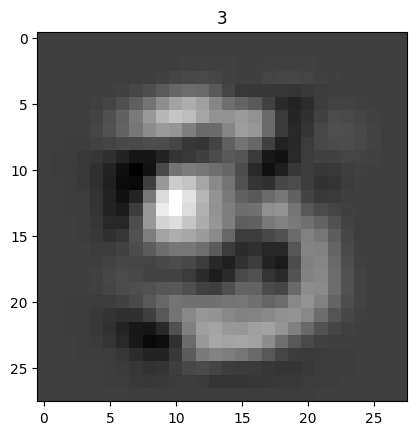

In [240]:
def sample(model, pca, cluster_to_digit_mapping):
    xs, ys = model.sample()
    x = pca.inverse_transform(xs[0])
    cluster_index = ys[0]
    digit_label = cluster_to_digit_mapping[cluster_index]
    return x, digit_label

def plot_sample(x, y):
    sample_array = np.array(x).reshape(28, 28)
    plt.imshow(sample_array, cmap='gray')
    plt.title(y)
    plt.show()

x, y = sample(model, pca, cluster_to_digit_mapping)
plot_sample(x, y)

# PREDICT

In [235]:
input_sample = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160,160,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,255,255,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,140,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
true_label = 4

def predict(x, cluster_to_digit_mapping):
    x = np.array(x).reshape(1, -1)
    x_pca = pca.transform(x)
    cluster_index = model.predict(x_pca)[0]
    predicted_digit = cluster_to_digit_mapping[cluster_index]
    return predicted_digit

y = predict(input_sample, cluster_to_digit_mapping)
print(f'True: {true_label}, Pred: {y}')

True: 4, Pred: 1
